Diabetes dataset
- LinearRegession, DecisionTreeRegressor

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


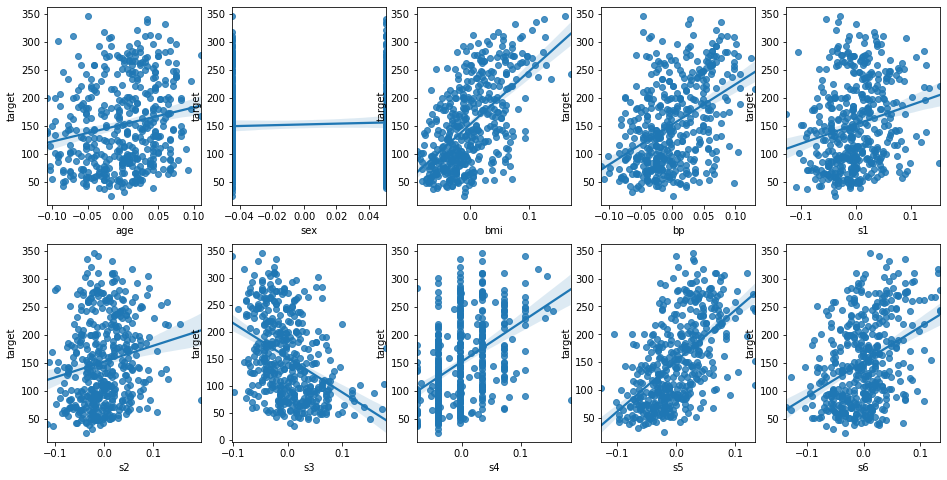

In [6]:
fig, axs = plt.subplots(figsize = (16, 8), ncols = 5, nrows = 2)
for i, feature in enumerate(diabetes.feature_names):
    row, col = i // 5, i % 5
    sns.regplot(x = feature, y = 'target', data = df, ax = axs[row][col])

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
for feature in diabetes.feature_names:
    X = df[feature].values.reshape(-1,1)
    y = diabetes.target
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{feature}: {r2:.4f}')

age: 0.0353
sex: 0.0019
bmi: 0.3439
bp: 0.1949
s1: 0.0450
s2: 0.0303
s3: 0.1559
s4: 0.1853
s5: 0.3202
s6: 0.1463


- Dividing train and test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size = 0.1, random_state = 2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [11]:
# weight
lr.coef_

array([ -14.06014661, -246.92791992,  547.80956855,  286.58708365,
       -656.22582592,  364.21134557,   60.28474402,  182.53318837,
        702.08292875,   68.21197298])

In [12]:
# bias
lr.intercept_

151.67372554450927

In [13]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 2021)
dtr.fit(X_train, y_train)
pred_dt = dtr.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_test, pred_lr)
mse_dt = mean_squared_error(y_test, pred_dt)
print(f'MSE - LR: {mse_lr:.4f}, DTR: {mse_dt:.4f}')

MSE - LR: 2370.1979, DTR: 6832.3111


In [15]:
res = pd.DataFrame({
    'y_test': y_test, 'lr': pred_lr, 'dt': pred_dt
})
res

,y_test,lr,dt
0,155.0,156.031216,127.0
1,167.0,185.700495,127.0
2,185.0,162.863840,206.0
3,109.0,162.545441,142.0
4,65.0,78.518494,127.0
5,77.0,60.600694,75.0
6,277.0,175.198247,168.0
7,244.0,176.770871,144.0
8,148.0,131.425197,118.0
9,102.0,88.053772,214.0
